In [1]:
import numpy as np
import scipy.integrate
import scipy.stats
import scipy.misc
import math
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Prior π(λ)')

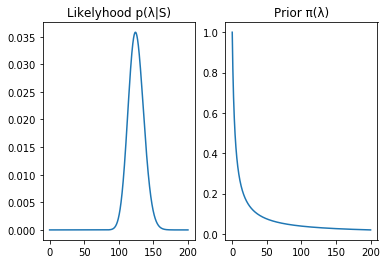

In [2]:
n = 60
S = 124
alpha = 0.25
cutoff = 2**10

prior = lambda x: 1./(1. + alpha * x)

def lhood(l, S=S):
    return scipy.stats.poisson.pmf(S, l)

vals = np.arange(0., 200., 0.1)
prior_vals = [prior(x) for x in vals]
lhood_vals= [lhood(x) for x in vals]

plt.subplot(1,2,1)
plt.plot(vals, lhood_vals)
plt.title("Likelyhood p(λ|S)")
plt.subplot(1,2,2)
plt.plot(vals, prior_vals)
plt.title("Prior π(λ)")


(0.031242316260646694, 1.0682554228150217e-08)
(0.9999999999999828, 2.848238466009327e-10)


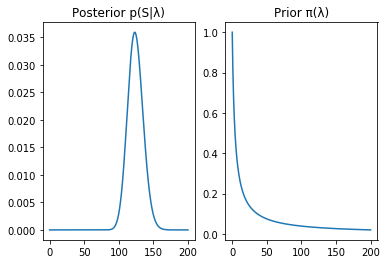

In [3]:
raw_posterior = lambda l: prior(l)*lhood(l)
posterior_norm = scipy.integrate.quad(raw_posterior, 0., cutoff)
print(posterior_norm)

posterior = lambda l: raw_posterior(l)/posterior_norm[0]

posterior_vals = [posterior(x) for x in vals]

plt.subplot(1,2,1)
plt.plot(vals, posterior_vals)
plt.title("Posterior p(S|λ)")
plt.subplot(1,2,2)
plt.plot(vals, prior_vals)
plt.title("Prior π(λ)")

print(scipy.integrate.quad(lambda x: posterior(x), 0., cutoff))

In [4]:
bayes_mean = scipy.integrate.quad(lambda x: x * posterior(x), 0., cutoff)
print("Bayes estimator: {}".format(bayes_mean[0]))

Bayes estimator: 124.03148033675856


In [5]:
conf = 0.95
prec = 0.01

#integration steps and borders
delta_l = 0.01
l_min = 0.
l_max = 200.

#find the maximum
l_ex = l_min
l_range = np.arange(l_min, l_max, delta_l)
for l in l_range:
    if posterior(l) >= posterior(l_ex):
        l_ex = l
print("Maximum posterior at: {}".format(l_ex))

#integrate over symmetric interval around maximum
#increase interval size
#until confidence is reached
best_l = False
l_1 = l_ex
l_2 = l_ex
while best_l == False:
    l_2 = l_2 + delta_l
    l_1 = l_1 - delta_l
    prob = scipy.integrate.quad(posterior, l_1, l_2)
    if prob[0] >= conf:
        best_l = True
        
print("Symmetric 95/% interval around maximum: [{},{}]".format(l_1, l_2))
print("NOT equal to HPD, but close, due to relatively small skewness")



Maximum posterior at: 123.03
Symmetric 95/% interval around maximum: [101.10999999998879,144.9499999999871]
NOT equal to HPD, but close, due to relatively small skewness


In [6]:
#start with an infinitesimal interval around maximum, extend so that value of posterior distribution is maximized
#Works because density is monotone on both side s of the distribution!
#Otherwise an interval scan would be needed
l_1 = l_ex - delta_l
l_2 = l_ex + delta_l

#boolean for cutting iteration off
is_conf = False
while is_conf == False:
    # look at neighbours and determine which is larger -> select the larger for interval extension
    if posterior(l_2 + delta_l) < posterior(l_1 - delta_l):
        l_1 = l_1 - delta_l
    elif posterior(l_2 + delta_l) > posterior(l_1 - delta_l):
        l_2 = l_2 + delta_l
    #or choose both if of equal size
    else:
        l_1 = l_1 - delta_l
        l_2 = l_2 + delta_l
    #integrate over interval
    area = scipy.integrate.quad(posterior, l_1, l_2)
    print("integrating over [{}, {}]: {}".format(l_1, l_2, area[0]))
    
    #area keeps growing, stop if confidence threshold is met
    if area[0] >= conf:
        is_conf = True

print("HPD 95/% interval: [{},{}]".format(l_1, l_2))

integrating over [123.02, 123.05000000000001]: 0.0010784067482504517
integrating over [123.00999999999999, 123.05000000000001]: 0.001437875382467958
integrating over [123.00999999999999, 123.06000000000002]: 0.001797343606311258
integrating over [122.99999999999999, 123.06000000000002]: 0.0021568116124245
integrating over [122.99999999999999, 123.07000000000002]: 0.00251627900321521
integrating over [122.98999999999998, 123.07000000000002]: 0.0028757460888519893
integrating over [122.98999999999998, 123.08000000000003]: 0.0032352123545046096
integrating over [122.97999999999998, 123.08000000000003]: 0.003594678227247452
integrating over [122.97999999999998, 123.09000000000003]: 0.003954143075726389
integrating over [122.96999999999997, 123.09000000000003]: 0.004313607443113129
integrating over [122.96999999999997, 123.10000000000004]: 0.0046730705824340295
integrating over [122.95999999999997, 123.10000000000004]: 0.005032533151958675
integrating over [122.95999999999997, 123.110000000

integrating over [122.12999999999954, 123.93000000000046]: 0.06463347805069322
integrating over [122.12999999999954, 123.94000000000047]: 0.06499176198705461
integrating over [122.11999999999954, 123.94000000000047]: 0.06535002637418903
integrating over [122.11999999999954, 123.95000000000047]: 0.06570828404193306
integrating over [122.10999999999953, 123.95000000000047]: 0.06606652168298684
integrating over [122.10999999999953, 123.96000000000048]: 0.06642475279707213
integrating over [122.09999999999953, 123.96000000000048]: 0.0667829633984271
integrating over [122.09999999999953, 123.97000000000048]: 0.06714116767392671
integrating over [122.08999999999952, 123.97000000000048]: 0.06749935094198165
integrating over [122.08999999999952, 123.98000000000049]: 0.06785752809407768
integrating over [122.07999999999952, 123.98000000000049]: 0.06821568373525146
integrating over [122.07999999999952, 123.99000000000049]: 0.06857383347923748
integrating over [122.06999999999951, 123.99000000000

integrating over [121.50999999999922, 124.57000000000079]: 0.10964961689289825
integrating over [121.49999999999922, 124.57000000000079]: 0.11000566889061116
integrating over [121.49999999999922, 124.5800000000008]: 0.11036170199126998
integrating over [121.48999999999921, 124.5800000000008]: 0.11071770910075864
integrating over [121.48999999999921, 124.5900000000008]: 0.1110736979389277
integrating over [121.47999999999921, 124.5900000000008]: 0.11142965986908819
integrating over [121.47999999999921, 124.6000000000008]: 0.11178560416806199
integrating over [121.4699999999992, 124.6000000000008]: 0.11214152062785308
integrating over [121.4699999999992, 124.61000000000081]: 0.1124974201110728
integrating over [121.4599999999992, 124.61000000000081]: 0.11285329080951322
integrating over [121.4599999999992, 124.62000000000081]: 0.11320914520057426
integrating over [121.44999999999919, 124.62000000000081]: 0.11356496984675085
integrating over [121.44999999999919, 124.63000000000082]: 0.113

integrating over [120.97999999999895, 125.10000000000106]: 0.14725404229965358
integrating over [120.97999999999895, 125.11000000000107]: 0.1476073518894813
integrating over [120.96999999999895, 125.11000000000107]: 0.1479606253646955
integrating over [120.96999999999895, 125.12000000000107]: 0.14831387624809791
integrating over [120.95999999999894, 125.12000000000107]: 0.14866708951082105
integrating over [120.95999999999894, 125.13000000000108]: 0.14902028141989093
integrating over [120.94999999999894, 125.13000000000108]: 0.1493734341833702
integrating over [120.94999999999894, 125.14000000000108]: 0.14972656685038907
integrating over [120.93999999999893, 125.14000000000108]: 0.15007965882797933
integrating over [120.93999999999893, 125.15000000000109]: 0.1504327319853985
integrating over [120.92999999999893, 125.15000000000109]: 0.15078576289056433
integrating over [120.92999999999893, 125.16000000000109]: 0.15113877627103142
integrating over [120.91999999999892, 125.16000000000109

integrating over [120.41999999999867, 125.68000000000136]: 0.18732344887880675
integrating over [120.41999999999867, 125.69000000000136]: 0.18767291649658457
integrating over [120.40999999999866, 125.69000000000136]: 0.18802237956531193
integrating over [120.40999999999866, 125.70000000000137]: 0.188371773255903
integrating over [120.39999999999866, 125.70000000000137]: 0.1887211602308255
integrating over [120.39999999999866, 125.71000000000137]: 0.18907047973777052
integrating over [120.38999999999865, 125.71000000000137]: 0.1894197903389504
integrating over [120.38999999999865, 125.72000000000138]: 0.18976903540601311
integrating over [120.37999999999865, 125.72000000000138]: 0.19011826935363646
integrating over [120.37999999999865, 125.73000000000138]: 0.19046743972480798
integrating over [120.36999999999864, 125.73000000000138]: 0.19081659673920784
integrating over [120.36999999999864, 125.74000000000139]: 0.19116569215867085
integrating over [120.35999999999864, 125.74000000000139

integrating over [119.85999999999838, 126.26000000000165]: 0.226907590804295
integrating over [119.84999999999837, 126.26000000000165]: 0.22725236567944587
integrating over [119.84999999999837, 126.27000000000166]: 0.22759712840763038
integrating over [119.83999999999837, 126.27000000000166]: 0.2279418117491625
integrating over [119.83999999999837, 126.28000000000166]: 0.22828648604425417
integrating over [119.82999999999836, 126.28000000000166]: 0.22863107758121703
integrating over [119.82999999999836, 126.29000000000167]: 0.22897566319995616
integrating over [119.81999999999836, 126.29000000000167]: 0.22932016266157604
integrating over [119.81999999999836, 126.30000000000167]: 0.22966465936095523
integrating over [119.81999999999836, 126.31000000000168]: 0.2300090668982046
integrating over [119.80999999999835, 126.31000000000168]: 0.23035347401389375
integrating over [119.80999999999835, 126.32000000000168]: 0.2306977921464746
integrating over [119.79999999999835, 126.32000000000168]

integrating over [119.3099999999981, 126.84000000000195]: 0.26556989387084806
integrating over [119.2999999999981, 126.84000000000195]: 0.26590923698877167
integrating over [119.2999999999981, 126.85000000000196]: 0.2662484761399069
integrating over [119.28999999999809, 126.85000000000196]: 0.2665877131069394
integrating over [119.28999999999809, 126.86000000000196]: 0.266926850129167
integrating over [119.27999999999808, 126.86000000000196]: 0.2672659806852708
integrating over [119.27999999999808, 126.87000000000197]: 0.2676050153500637
integrating over [119.26999999999808, 126.87000000000197]: 0.2679440392353721
integrating over [119.26999999999808, 126.88000000000197]: 0.26828297131448536
integrating over [119.25999999999807, 126.88000000000197]: 0.26862188826939076
integrating over [119.25999999999807, 126.89000000000198]: 0.26896071753482836
integrating over [119.24999999999807, 126.89000000000198]: 0.26929952729993883
integrating over [119.24999999999807, 126.90000000000198]: 0.2

integrating over [118.74999999999781, 127.42000000000225]: 0.30390262452817024
integrating over [118.7399999999978, 127.42000000000225]: 0.3042356289432912
integrating over [118.7399999999978, 127.43000000000225]: 0.30456857525534026
integrating over [118.7299999999978, 127.43000000000225]: 0.3049014593072497
integrating over [118.7299999999978, 127.44000000000226]: 0.3052342906882605
integrating over [118.7199999999978, 127.44000000000226]: 0.30556705412999796
integrating over [118.7199999999978, 127.45000000000226]: 0.3058997703675279
integrating over [118.70999999999779, 127.45000000000226]: 0.3062324129523572
integrating over [118.70999999999779, 127.46000000000227]: 0.3065650138342445
integrating over [118.69999999999779, 127.46000000000227]: 0.3068975353157081
integrating over [118.69999999999779, 127.47000000000227]: 0.30723002063006694
integrating over [118.68999999999778, 127.47000000000227]: 0.3075624207619466
integrating over [118.68999999999778, 127.48000000000228]: 0.30789

integrating over [118.17999999999752, 128.0200000000025]: 0.3424508745067898
integrating over [118.16999999999751, 128.0200000000025]: 0.34277663163186406
integrating over [118.16999999999751, 128.0300000000025]: 0.343102316040528
integrating over [118.15999999999751, 128.0300000000025]: 0.343427939142867
integrating over [118.15999999999751, 128.0400000000025]: 0.34375349639324826
integrating over [118.1499999999975, 128.0400000000025]: 0.3440789852411158
integrating over [118.1499999999975, 128.05000000000248]: 0.34440441513855397
integrating over [118.1399999999975, 128.05000000000248]: 0.3447297695005068
integrating over [118.1399999999975, 128.06000000000247]: 0.3450550718506622
integrating over [118.1299999999975, 128.06000000000247]: 0.3453802914955255
integrating over [118.1299999999975, 128.07000000000247]: 0.34570546610437125
integrating over [118.11999999999749, 128.07000000000247]: 0.34603055080127176
integrating over [118.11999999999749, 128.08000000000246]: 0.346355597475

integrating over [117.60999999999723, 128.61000000000197]: 0.3797900887978309
integrating over [117.60999999999723, 128.62000000000197]: 0.38010794786809854
integrating over [117.59999999999722, 128.62000000000197]: 0.38042570435731776
integrating over [117.59999999999722, 128.63000000000196]: 0.380743425315728
integrating over [117.58999999999722, 128.63000000000196]: 0.381061035041445
integrating over [117.58999999999722, 128.64000000000195]: 0.38137861771178483
integrating over [117.57999999999721, 128.64000000000195]: 0.3816960804592658
integrating over [117.57999999999721, 128.65000000000194]: 0.38201352466564176
integrating over [117.56999999999721, 128.65000000000194]: 0.38233084022047453
integrating over [117.56999999999721, 128.66000000000193]: 0.38264814578731626
integrating over [117.56999999999721, 128.67000000000192]: 0.38296531253936156
integrating over [117.5599999999972, 128.67000000000192]: 0.3832824806874255
integrating over [117.5599999999972, 128.6800000000019]: 0.3

integrating over [117.05999999999695, 129.20000000000144]: 0.41555502016798185
integrating over [117.05999999999695, 129.21000000000143]: 0.4158644395973313
integrating over [117.04999999999694, 129.21000000000143]: 0.41617381358328537
integrating over [117.04999999999694, 129.22000000000142]: 0.41648308505613174
integrating over [117.03999999999694, 129.22000000000142]: 0.4167923009451057
integrating over [117.03999999999694, 129.2300000000014]: 0.4171014243043374
integrating over [117.02999999999693, 129.2300000000014]: 0.41741048189949775
integrating over [117.02999999999693, 129.2400000000014]: 0.4177194569883923
integrating over [117.01999999999693, 129.2400000000014]: 0.41802835609321737
integrating over [117.01999999999693, 129.2500000000014]: 0.4183371827553144
integrating over [117.00999999999692, 129.2500000000014]: 0.41864592317365895
integrating over [117.00999999999692, 129.26000000000138]: 0.41895460125287826
integrating over [116.99999999999692, 129.26000000000138]: 0.41

integrating over [116.51999999999667, 129.7900000000009]: 0.450027840543793
integrating over [116.50999999999667, 129.7900000000009]: 0.4503284041177416
integrating over [116.50999999999667, 129.8000000000009]: 0.4506288360803585
integrating over [116.49999999999666, 129.8000000000009]: 0.450929231421091
integrating over [116.49999999999666, 129.81000000000088]: 0.45122950672536877
integrating over [116.48999999999666, 129.81000000000088]: 0.4515297336548617
integrating over [116.48999999999666, 129.82000000000087]: 0.45182985216329213
integrating over [116.47999999999665, 129.82000000000087]: 0.45212991050384177
integrating over [116.47999999999665, 129.83000000000087]: 0.4524298720792548
integrating over [116.46999999999665, 129.83000000000087]: 0.45272976165355655
integrating over [116.46999999999665, 129.84000000000086]: 0.4530295661591293
integrating over [116.45999999999664, 129.84000000000086]: 0.4533292867902016
integrating over [116.45999999999664, 129.85000000000085]: 0.45362

integrating over [115.9799999999964, 130.37000000000037]: 0.483175227096654
integrating over [115.96999999999639, 130.37000000000037]: 0.4834664602969413
integrating over [115.96999999999639, 130.38000000000036]: 0.4837575891284602
integrating over [115.95999999999638, 130.38000000000036]: 0.48404864500246875
integrating over [115.95999999999638, 130.39000000000036]: 0.48433960975500057
integrating over [115.94999999999638, 130.39000000000036]: 0.4846304881444762
integrating over [115.94999999999638, 130.40000000000035]: 0.4849212887000098
integrating over [115.93999999999637, 130.40000000000035]: 0.48521198944710237
integrating over [115.93999999999637, 130.41000000000034]: 0.48550262568794683
integrating over [115.92999999999637, 130.41000000000034]: 0.4857931486351841
integrating over [115.92999999999637, 130.42000000000033]: 0.4860836204439915
integrating over [115.91999999999636, 130.42000000000033]: 0.48637396543432393
integrating over [115.91999999999636, 130.43000000000032]: 0.

integrating over [115.44999999999612, 130.93999999999986]: 0.5146917880642323
integrating over [115.43999999999612, 130.93999999999986]: 0.5149734138112076
integrating over [115.43999999999612, 130.94999999999985]: 0.5152550116154527
integrating over [115.42999999999611, 130.94999999999985]: 0.5155364521736843
integrating over [115.42999999999611, 130.95999999999984]: 0.5158178797082773
integrating over [115.42999999999611, 130.96999999999983]: 0.5160991368743288
integrating over [115.41999999999611, 130.96999999999983]: 0.5163803921058462
integrating over [115.41999999999611, 130.97999999999982]: 0.5166614788048135
integrating over [115.4099999999961, 130.97999999999982]: 0.516942548572014
integrating over [115.4099999999961, 130.9899999999998]: 0.5172234647057126
integrating over [115.3999999999961, 130.9899999999998]: 0.5175043488714007
integrating over [115.3999999999961, 130.9999999999998]: 0.5177850943419698
integrating over [115.38999999999609, 130.9999999999998]: 0.518065792769

integrating over [114.85999999999582, 131.57999999999927]: 0.548661630161959
integrating over [114.85999999999582, 131.58999999999926]: 0.5489321453080379
integrating over [114.84999999999582, 131.58999999999926]: 0.5492026215362824
integrating over [114.84999999999582, 131.59999999999926]: 0.5494729607577925
integrating over [114.83999999999581, 131.59999999999926]: 0.5497432443263981
integrating over [114.83999999999581, 131.60999999999925]: 0.5500134075457784
integrating over [114.8299999999958, 131.60999999999925]: 0.5502834983399773
integrating over [114.8299999999958, 131.61999999999924]: 0.5505534854799684
integrating over [114.8199999999958, 131.61999999999924]: 0.5508233833853577
integrating over [114.8199999999958, 131.62999999999923]: 0.5510931943690439
integrating over [114.8099999999958, 131.62999999999923]: 0.5513628992716825
integrating over [114.8099999999958, 131.63999999999922]: 0.5516325340224587
integrating over [114.79999999999579, 131.63999999999922]: 0.5519020458

integrating over [113.90999999999534, 132.62999999999832]: 0.6009125947426569
integrating over [113.89999999999533, 132.62999999999832]: 0.6011643111316387
integrating over [113.89999999999533, 132.6399999999983]: 0.6014159918381513
integrating over [113.88999999999533, 132.6399999999983]: 0.6016675064503351
integrating over [113.88999999999533, 132.6499999999983]: 0.6019190048620848
integrating over [113.88999999999533, 132.6599999999983]: 0.6021703209353021
integrating over [113.87999999999532, 132.6599999999983]: 0.6024216336940372
integrating over [113.87999999999532, 132.66999999999828]: 0.6026727673853145
integrating over [113.86999999999531, 132.66999999999828]: 0.6029238782143429
integrating over [113.86999999999531, 132.67999999999827]: 0.6031748294805822
integrating over [113.85999999999531, 132.67999999999827]: 0.6034257383040151
integrating over [113.85999999999531, 132.68999999999826]: 0.6036765071024242
integrating over [113.8499999999953, 132.68999999999826]: 0.603927213

integrating over [113.37999999999506, 133.21999999999778]: 0.6285098116124914
integrating over [113.36999999999506, 133.21999999999778]: 0.6287507375931336
integrating over [113.36999999999506, 133.22999999999777]: 0.6289915981656907
integrating over [113.35999999999505, 133.22999999999777]: 0.6292323188595641
integrating over [113.35999999999505, 133.23999999999776]: 0.6294729950860704
integrating over [113.34999999999505, 133.23999999999776]: 0.6297135104378243
integrating over [113.34999999999505, 133.24999999999775]: 0.6299540022926489
integrating over [113.34999999999505, 133.25999999999775]: 0.6301943097504829
integrating over [113.33999999999504, 133.25999999999775]: 0.6304346197050928
integrating over [113.33999999999504, 133.26999999999774]: 0.6306747427408913
integrating over [113.32999999999504, 133.26999999999774]: 0.6309148472437719
integrating over [113.32999999999504, 133.27999999999773]: 0.6311547858328448
integrating over [113.31999999999503, 133.27999999999773]: 0.631

integrating over [112.49999999999461, 134.20999999999688]: 0.6718683362299874
integrating over [112.48999999999461, 134.20999999999688]: 0.6720910285184047
integrating over [112.48999999999461, 134.21999999999687]: 0.6723135606690928
integrating over [112.4799999999946, 134.21999999999687]: 0.6725360443129413
integrating over [112.4799999999946, 134.22999999999686]: 0.6727583909970377
integrating over [112.4699999999946, 134.22999999999686]: 0.6729806659756635
integrating over [112.4699999999946, 134.23999999999685]: 0.6732028271959813
integrating over [112.4599999999946, 134.23999999999685]: 0.673424893489019
integrating over [112.4599999999946, 134.24999999999685]: 0.6736468692486903
integrating over [112.44999999999459, 134.24999999999685]: 0.6738687268362228
integrating over [112.44999999999459, 134.25999999999684]: 0.6740905171386102
integrating over [112.43999999999458, 134.25999999999684]: 0.6743121660010857
integrating over [112.43999999999458, 134.26999999999683]: 0.6745337708

integrating over [111.98999999999435, 134.77999999999636]: 0.6953478035070843
integrating over [111.97999999999435, 134.77999999999636]: 0.6955598365162051
integrating over [111.97999999999435, 134.78999999999635]: 0.6957718094737237
integrating over [111.96999999999434, 134.78999999999635]: 0.6959836332705215
integrating over [111.96999999999434, 134.79999999999634]: 0.6961954213504753
integrating over [111.96999999999434, 134.80999999999634]: 0.6964070245708075
integrating over [111.95999999999434, 134.80999999999634]: 0.6966186391539757
integrating over [111.95999999999434, 134.81999999999633]: 0.6968300575328887
integrating over [111.94999999999433, 134.81999999999633]: 0.6970414629015537
integrating over [111.94999999999433, 134.82999999999632]: 0.6972526964574702
integrating over [111.93999999999433, 134.82999999999632]: 0.697463892611095
integrating over [111.93999999999433, 134.8399999999963]: 0.6976749413627552
integrating over [111.92999999999432, 134.8399999999963]: 0.697885

integrating over [111.309999999994, 135.53999999999567]: 0.7248743274886541
integrating over [111.309999999994, 135.54999999999566]: 0.7250723184353263
integrating over [111.299999999994, 135.54999999999566]: 0.7252701406454175
integrating over [111.299999999994, 135.55999999999565]: 0.72546794878381
integrating over [111.299999999994, 135.56999999999564]: 0.7256655741503323
integrating over [111.289999999994, 135.56999999999564]: 0.7258631879004507
integrating over [111.289999999994, 135.57999999999564]: 0.7260606305318121
integrating over [111.27999999999399, 135.57999999999564]: 0.7262580358455567
integrating over [111.27999999999399, 135.58999999999563]: 0.7264552957786
integrating over [111.26999999999398, 135.58999999999563]: 0.7266524926798115
integrating over [111.26999999999398, 135.59999999999562]: 0.7268495699517558
integrating over [111.25999999999398, 135.59999999999562]: 0.727046558464651
integrating over [111.25999999999398, 135.6099999999956]: 0.727243453112824
integrat

integrating over [110.67999999999368, 136.269999999995]: 0.7509065785596107
integrating over [110.67999999999368, 136.279999999995]: 0.7510913342295436
integrating over [110.66999999999368, 136.279999999995]: 0.7512760832710161
integrating over [110.66999999999368, 136.289999999995]: 0.7514606593770331
integrating over [110.65999999999367, 136.289999999995]: 0.7516452021182763
integrating over [110.65999999999367, 136.29999999999498]: 0.751829598712739
integrating over [110.64999999999367, 136.29999999999498]: 0.7520139351989228
integrating over [110.64999999999367, 136.30999999999497]: 0.7521981523343709
integrating over [110.63999999999366, 136.30999999999497]: 0.752382282610903
integrating over [110.63999999999366, 136.31999999999496]: 0.7525663203401098
integrating over [110.62999999999366, 136.31999999999496]: 0.7527502444528079
integrating over [110.62999999999366, 136.32999999999495]: 0.7529341028287269
integrating over [110.61999999999365, 136.32999999999495]: 0.753117820823689

integrating over [110.00999999999334, 137.0499999999943]: 0.7767070242922355
integrating over [109.99999999999334, 137.0499999999943]: 0.7768780665001623
integrating over [109.99999999999334, 137.0599999999943]: 0.7770489884500832
integrating over [109.98999999999333, 137.0599999999943]: 0.7772198280916556
integrating over [109.98999999999333, 137.06999999999428]: 0.7773905751482104
integrating over [109.97999999999332, 137.06999999999428]: 0.7775612122898359
integrating over [109.97999999999332, 137.07999999999427]: 0.7777317845202197
integrating over [109.96999999999332, 137.07999999999427]: 0.7779022192284827
integrating over [109.96999999999332, 137.08999999999426]: 0.7780726167001726
integrating over [109.96999999999332, 137.09999999999425]: 0.7782428394807326
integrating over [109.95999999999331, 137.09999999999425]: 0.7784130718225377
integrating over [109.95999999999331, 137.10999999999424]: 0.7785831199797049
integrating over [109.94999999999331, 137.10999999999424]: 0.7787531

integrating over [109.50999999999308, 137.62999999999377]: 0.7946388814410693
integrating over [109.49999999999308, 137.62999999999377]: 0.7947998823908532
integrating over [109.49999999999308, 137.63999999999376]: 0.7949607769432138
integrating over [109.48999999999307, 137.63999999999376]: 0.7951215790034638
integrating over [109.48999999999307, 137.64999999999375]: 0.795282302842018
integrating over [109.47999999999307, 137.64999999999375]: 0.7954429060935218
integrating over [109.47999999999307, 137.65999999999374]: 0.7956034592951179
integrating over [109.46999999999306, 137.65999999999374]: 0.7957638638190742
integrating over [109.46999999999306, 137.66999999999373]: 0.7959242464607353
integrating over [109.46999999999306, 137.67999999999373]: 0.7960844586195698
integrating over [109.45999999999306, 137.67999999999373]: 0.7962446644973393
integrating over [109.45999999999306, 137.68999999999372]: 0.7964047062507067
integrating over [109.44999999999305, 137.68999999999372]: 0.7965

integrating over [108.96999999999281, 138.2499999999932]: 0.8127060462759235
integrating over [108.96999999999281, 138.2599999999932]: 0.8128565075616279
integrating over [108.9599999999928, 138.2599999999932]: 0.8130068908862751
integrating over [108.9599999999928, 138.2699999999932]: 0.813157186502482
integrating over [108.9499999999928, 138.2699999999932]: 0.8133073756879663
integrating over [108.9499999999928, 138.27999999999318]: 0.8134575057204176
integrating over [108.93999999999279, 138.27999999999318]: 0.8136075008618979
integrating over [108.93999999999279, 138.28999999999317]: 0.8137574653965559
integrating over [108.93999999999279, 138.29999999999316]: 0.8139072645194518
integrating over [108.92999999999279, 138.29999999999316]: 0.8140570657122251
integrating over [108.92999999999279, 138.30999999999315]: 0.8142066995095163
integrating over [108.91999999999278, 138.30999999999315]: 0.8143563068492738
integrating over [108.91999999999278, 138.31999999999314]: 0.8145057754072

integrating over [108.47999999999256, 138.82999999999268]: 0.8283039304443971
integrating over [108.47999999999256, 138.83999999999267]: 0.8284449286259696
integrating over [108.46999999999255, 138.83999999999267]: 0.828585915506318
integrating over [108.46999999999255, 138.84999999999266]: 0.8287267532014325
integrating over [108.45999999999255, 138.84999999999266]: 0.828867550888901
integrating over [108.45999999999255, 138.85999999999265]: 0.8290082281904709
integrating over [108.44999999999254, 138.85999999999265]: 0.8291488367918167
integrating over [108.44999999999254, 138.86999999999264]: 0.8292893537928401
integrating over [108.43999999999254, 138.86999999999264]: 0.8294297734151231
integrating over [108.43999999999254, 138.87999999999263]: 0.8295701302086352
integrating over [108.42999999999253, 138.87999999999263]: 0.8297103609590754
integrating over [108.42999999999253, 138.88999999999263]: 0.8298505576383091
integrating over [108.42999999999253, 138.89999999999262]: 0.82999

integrating over [107.91999999999227, 139.48999999999208]: 0.8448768432713994
integrating over [107.91999999999227, 139.49999999999207]: 0.8450074534206058
integrating over [107.90999999999227, 139.49999999999207]: 0.8451380159915254
integrating over [107.90999999999227, 139.50999999999206]: 0.8452684720075967
integrating over [107.89999999999226, 139.50999999999206]: 0.8453988516971922
integrating over [107.89999999999226, 139.51999999999205]: 0.8455291536796787
integrating over [107.88999999999226, 139.51999999999205]: 0.8456593506064833
integrating over [107.88999999999226, 139.52999999999204]: 0.8457894986549562
integrating over [107.87999999999225, 139.52999999999204]: 0.8459195129377564
integrating over [107.87999999999225, 139.53999999999203]: 0.8460495071518729
integrating over [107.87999999999225, 139.54999999999202]: 0.8461793476314077
integrating over [107.86999999999225, 139.54999999999202]: 0.84630917938913
integrating over [107.86999999999225, 139.55999999999202]: 0.84643

integrating over [107.35999999999198, 140.16999999999146]: 0.8604454960775925
integrating over [107.34999999999198, 140.16999999999146]: 0.860566005046875
integrating over [107.34999999999198, 140.17999999999145]: 0.8606863649996278
integrating over [107.33999999999197, 140.17999999999145]: 0.8608066980104462
integrating over [107.33999999999197, 140.18999999999144]: 0.8609269107822718
integrating over [107.32999999999197, 140.18999999999144]: 0.8610470679632354
integrating over [107.32999999999197, 140.19999999999143]: 0.8611671336589396
integrating over [107.31999999999196, 140.19999999999143]: 0.8612871151388035
integrating over [107.31999999999196, 140.20999999999142]: 0.8614070338632246
integrating over [107.30999999999196, 140.20999999999142]: 0.8615268397709291
integrating over [107.30999999999196, 140.21999999999142]: 0.8616466116290115
integrating over [107.30999999999196, 140.2299999999914]: 0.8617662367257706
integrating over [107.29999999999195, 140.2299999999914]: 0.861885

integrating over [106.54999999999157, 141.13999999999058]: 0.8806531488914443
integrating over [106.53999999999157, 141.13999999999058]: 0.8807598348858892
integrating over [106.53999999999157, 141.14999999999057]: 0.8808664149488967
integrating over [106.52999999999156, 141.14999999999057]: 0.8809729358832779
integrating over [106.52999999999156, 141.15999999999056]: 0.8810793791944825
integrating over [106.51999999999155, 141.15999999999056]: 0.8811857352087965
integrating over [106.51999999999155, 141.16999999999055]: 0.8812920418780728
integrating over [106.50999999999155, 141.16999999999055]: 0.8813982331125115
integrating over [106.50999999999155, 141.17999999999054]: 0.8815044032496016
integrating over [106.50999999999155, 141.18999999999053]: 0.8816104369644845
integrating over [106.49999999999154, 141.18999999999053]: 0.8817164635593411
integrating over [106.49999999999154, 141.19999999999052]: 0.8818223609618551
integrating over [106.48999999999154, 141.19999999999052]: 0.881

integrating over [106.06999999999132, 141.71999999999005]: 0.891549328944801
integrating over [106.05999999999132, 141.71999999999005]: 0.8916482519790114
integrating over [106.05999999999132, 141.72999999999004]: 0.8917470829752224
integrating over [106.04999999999131, 141.72999999999004]: 0.8918458477963512
integrating over [106.04999999999131, 141.73999999999003]: 0.8919445484621601
integrating over [106.03999999999131, 141.73999999999003]: 0.892043155215371
integrating over [106.03999999999131, 141.74999999999002]: 0.8921417256622903
integrating over [106.03999999999131, 141.75999999999001]: 0.8922401660017821
integrating over [106.0299999999913, 141.75999999999001]: 0.8923386148322703
integrating over [106.0299999999913, 141.76999999999]: 0.8924369251759218
integrating over [106.0199999999913, 141.76999999999]: 0.8925352162290355
integrating over [106.0199999999913, 141.77999999999]: 0.8926333966883608
integrating over [106.0099999999913, 141.77999999999]: 0.8927315301095342
integ

integrating over [105.25999999999091, 142.69999999998916]: 0.9081450011075072
integrating over [105.25999999999091, 142.70999999998915]: 0.9082315918645834
integrating over [105.2499999999909, 142.70999999998915]: 0.9083181769624101
integrating over [105.2499999999909, 142.71999999998914]: 0.9084046483748005
integrating over [105.2399999999909, 142.71999999998914]: 0.9084910872726611
integrating over [105.2399999999909, 142.72999999998913]: 0.908577439452654
integrating over [105.2299999999909, 142.72999999998913]: 0.9086637323014964
integrating over [105.2299999999909, 142.73999999998912]: 0.908749965361439
integrating over [105.21999999999089, 142.73999999998912]: 0.9088361123122768
integrating over [105.21999999999089, 142.74999999998911]: 0.9089222263644662
integrating over [105.21999999999089, 142.7599999999891]: 0.9090082215212287
integrating over [105.20999999999088, 142.7599999999891]: 0.9090942227251643
integrating over [105.20999999999088, 142.7699999999891]: 0.90918009909877

integrating over [104.66999999999061, 143.4299999999885]: 0.9190227683967589
integrating over [104.6599999999906, 143.4299999999885]: 0.9191009874526265
integrating over [104.6599999999906, 143.4399999999885]: 0.9191791607485613
integrating over [104.6499999999906, 143.4399999999885]: 0.9192572425834039
integrating over [104.6499999999906, 143.44999999998848]: 0.9193353047104293
integrating over [104.6499999999906, 143.45999999998847]: 0.9194132557800822
integrating over [104.6399999999906, 143.45999999998847]: 0.9194912005470054
integrating over [104.6399999999906, 143.46999999998846]: 0.9195690406706726
integrating over [104.62999999999059, 143.46999999998846]: 0.9196468485228584
integrating over [104.62999999999059, 143.47999999998845]: 0.9197245778120371
integrating over [104.61999999999058, 143.47999999998845]: 0.9198022489026573
integrating over [104.61999999999058, 143.48999999998844]: 0.9198798674687546
integrating over [104.60999999999058, 143.48999999998844]: 0.91995740195102

integrating over [104.12999999999033, 144.0999999999879]: 0.9280511781031372
integrating over [104.11999999999033, 144.0999999999879]: 0.928122206776003
integrating over [104.11999999999033, 144.10999999998788]: 0.9281931771485181
integrating over [104.10999999999032, 144.10999999998788]: 0.9282640768904207
integrating over [104.10999999999032, 144.11999999998787]: 0.9283349435106608
integrating over [104.10999999999032, 144.12999999998786]: 0.9284057064884574
integrating over [104.09999999999032, 144.12999999998786]: 0.9284764774530624
integrating over [104.09999999999032, 144.13999999998785]: 0.9285471368980458
integrating over [104.08999999999031, 144.13999999998785]: 0.9286177792390856
integrating over [104.08999999999031, 144.14999999998784]: 0.9286883352609423
integrating over [104.0799999999903, 144.14999999998784]: 0.9287588491320667
integrating over [104.0799999999903, 144.15999999998783]: 0.9288293018404837
integrating over [104.0699999999903, 144.15999999998783]: 0.928899687

integrating over [103.55999999999004, 144.80999999998724]: 0.9366858442724945
integrating over [103.54999999999004, 144.80999999998724]: 0.9367497689197006
integrating over [103.54999999999004, 144.81999999998723]: 0.936813643619679
integrating over [103.53999999999003, 144.81999999998723]: 0.9368774480794722
integrating over [103.53999999999003, 144.82999999998722]: 0.9369412267304275
integrating over [103.53999999999003, 144.8399999999872]: 0.9370049094394417
integrating over [103.52999999999003, 144.8399999999872]: 0.9370685938647024
integrating over [103.52999999999003, 144.8499999999872]: 0.9371321807387365
integrating over [103.51999999999002, 144.8499999999872]: 0.9371957452823442
integrating over [103.51999999999002, 144.8599999999872]: 0.9372592364284087
integrating over [103.50999999999001, 144.8599999999872]: 0.9373226812431457
integrating over [103.50999999999001, 144.8699999999872]: 0.9373860767681889
integrating over [103.49999999999001, 144.8699999999872]: 0.937449402006

integrating over [102.65999999998958, 145.92999999998622]: 0.9485566262349817
integrating over [102.65999999998958, 145.9399999999862]: 0.9486103982188118
integrating over [102.64999999998957, 145.9399999999862]: 0.9486641141392084
integrating over [102.64999999998957, 145.9499999999862]: 0.9487178017645191
integrating over [102.64999999998957, 145.9599999999862]: 0.948771405132733
integrating over [102.63999999998957, 145.9599999999862]: 0.948825014472782
integrating over [102.63999999998957, 145.9699999999862]: 0.9488785336851848
integrating over [102.62999999998956, 145.9699999999862]: 0.9489320365939868
integrating over [102.62999999998956, 145.97999999998618]: 0.9489854717517964
integrating over [102.61999999998956, 145.97999999998618]: 0.949038868378161
integrating over [102.61999999998956, 145.98999999998617]: 0.9490922195826519
integrating over [102.60999999998955, 145.98999999998617]: 0.9491455100754708
integrating over [102.60999999998955, 145.99999999998616]: 0.9491987774277